[[ 0.   0. ]
 [ 0.6  0.8]
 [ 1.2  1.6]
 [ 1.8  2.4]
 [ 2.4  3.2]
 [ 3.   4. ]
 [ 3.6  4.8]
 [ 4.2  5.6]
 [ 4.8  6.4]
 [ 4.2  5.6]
 [ 4.8  6.4]]
[ 4.5  6. ]


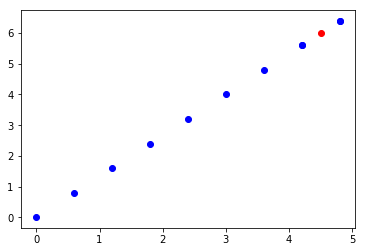

In [1]:
""" Tools for calculating Gradient Descent for ||Ax-b||. """
import matplotlib.pyplot as plt
import numpy as np


def main():
    ################################################################################
    # TODO(student): Input Variables
    A = np.array([[1, 0], [0, 1]])  # do not change this until the last part
    b = np.array([4.5, 6])  # b in the equation ||Ax-b||
    initial_position = np.array([0, 0])  # position at iteration 0
    total_step_count = 10  # number of GD steps to take
    step_size = lambda i: 1  # step size at iteration i
    ################################################################################

    # computes desired number of steps of gradient descent
    positions = compute_updates(A, b, initial_position, total_step_count, step_size)

    # print out the values of the x_i
    print(positions)
    print(np.dot(np.linalg.inv(A), b))

    # plot the values of the x_i
    plt.scatter(positions[:, 0], positions[:, 1], c='blue')
    plt.scatter(np.dot(np.linalg.inv(A), b)[0],
                np.dot(np.linalg.inv(A), b)[1], c='red')
    plt.plot()
    plt.show()


def compute_gradient(A, b, x):
    """Computes the gradient of ||Ax-b|| with respect to x."""
    return np.dot(A.T, (np.dot(A, x) - b)) / np.linalg.norm(np.dot(A, x) - b)


def compute_update(A, b, x, step_count, step_size):
    """Computes the new point after the update at x."""
    return x - step_size(step_count) * compute_gradient(A, b, x)


def compute_updates(A, b, p, total_step_count, step_size):
    """Computes several updates towards the minimum of ||Ax-b|| from p.

    Params:
        b: in the equation ||Ax-b||
        p: initialization point
        total_step_count: number of iterations to calculate
        step_size: function for determining the step size at step i
    """
    positions = [np.array(p)]
    for k in range(total_step_count):
        positions.append(compute_update(A, b, positions[-1], k, step_size))
    return np.array(positions)


main()